# Kitchen class

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.7.0'

In [3]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [24]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Abhishek Chaubey\Desktop\desktop\KitchenFramework\train",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r"C:\Users\Abhishek Chaubey\Desktop\desktop\KitchenFramework\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6024 images belonging to 2 classes.
Found 1456 images belonging to 2 classes.


In [25]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [26]:
from tensorflow.keras.regularizers import l2

In [27]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [28]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
189/189 [==============================] - 33s 166ms/step - loss: 0.7526 - accuracy: 0.6421 - val_loss: 1.8630 - val_accuracy: 0.2692
Epoch 2/15
189/189 [==============================] - 21s 110ms/step - loss: 0.5025 - accuracy: 0.7727 - val_loss: 2.0616 - val_accuracy: 0.2837
Epoch 3/15
189/189 [==============================] - 22s 116ms/step - loss: 0.4179 - accuracy: 0.8196 - val_loss: 2.4027 - val_accuracy: 0.1490
Epoch 4/15
189/189 [==============================] - 25s 133ms/step - loss: 0.3660 - accuracy: 0.8416 - val_loss: 2.5716 - val_accuracy: 0.1380
Epoch 5/15
189/189 [==============================] - 26s 138ms/step - loss: 0.3082 - accuracy: 0.8700 - val_loss: 2.7846 - val_accuracy: 0.1243
Epoch 6/15
189/189 [==============================] - 25s 133ms/step - loss: 0.2938 - accuracy: 0.8757 - val_loss: 2.4103 - val_accuracy: 0.1133
Epoch 7/15
189/189 [==============================] - 21s 113ms/step - loss: 0.2451 - accuracy: 0.9047 - val_loss: 3.4228 - val_ac

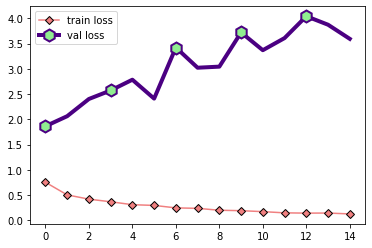

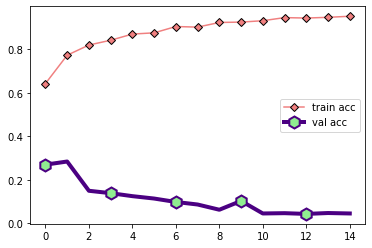

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(r.history['val_loss'], label='val loss', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12, markevery=3)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(r.history['val_accuracy'], label='val acc', color='#4b0082', linewidth=4,
         marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12, markevery=3)
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rkitchen_framework.h5')

In [12]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rkitchen_framework.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [2]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Chaubey\Desktop\desktop\KitchenFramework\train\kitchenutensils\5.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

NameError: name 'cnn' is not defined

In [15]:
result

array([[-1.985388]], dtype=float32)

In [12]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Chaubey\Desktop\desktop\KitchenFramework\kitchenutensils\10.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [13]:
result

array([[2.7285452]], dtype=float32)

In [20]:
if result[0]<0:
    print("The image classified is kitchenUtensils")
else:
    print("The image classified is KitchenWorking")

The image classified is KitchenWorking


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
threshold=0.5
preds_list = tet_set >= threshold
tn, fp, fn, tp = confusion_matrix(labels_list, preds_list).ravel()
accuracy = accuracy_score(training_set, test_set)

NameError: name 'tet_set' is not defined